<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mersad.esalati@gmail.com">Mersad Esalati</a><br></font><br>
    </div>
</div>

# Selenium

## Weather Info Crawler
Daily Weather Information:
- Temperature (°F) - only Avg metric
- Dew Point (°F) - only Avg metric
- Humidity (%) - only Avg metric
- Wind Speed (mph) - only Avg metric
- Pressure (in) - only Avg metric
- Precipitation (in) - only Avg metric
- date

In [1]:
from bs4 import BeautifulSoup as BS
from selenium import webdriver
from functools import reduce
import pandas as pd
import time
import pylab as pl

from datetime import datetime, timedelta
from collections import OrderedDict
from past.builtins import xrange

In [2]:
def render_page(url):
    driver = webdriver.Chrome('/usr/local/bin/chromedriver')
    time.sleep(30)
    driver.implicitly_wait(1000)
    driver.get(url)
    time.sleep(10)
    driver.implicitly_wait(1000)
    r = driver.page_source
    driver.implicitly_wait(1000)
    driver.quit()
    return r

### Please enter your time frame and url : 


In [3]:
du = ["2021-01-01", "2022-01-01"]
page = 'https://www.wunderground.com/history/monthly/us/va/arlington/KDCA/date/'

In [4]:
start, end = [datetime.strptime(_, "%Y-%m-%d") for _ in du]

#### for generating months

In [5]:
dates = OrderedDict(((start + timedelta(_)).strftime(r"%Y-%m"), None) for _ in xrange((end - start).days)).keys()

- Save data in ```wundergroundinfo``` folder as <b>Washington-date-.csv</b> file.
- Use BeautifulSoup library to pars data and tables in each page.
- Because of the variable number of days in each month and duplicate data on the pages, consider a different code for each table with a certain length.
- Split just average for each variable.
- Convert ```Date``` to datetime type.

In [6]:
output = pd.DataFrame()

for d in dates:

    url = str(str(page) + str(d))
    r = render_page(url)

    soup = BS(r, "html.parser")
    container = soup.find('lib-city-history-observation')
    check = container.find('tbody')

    data = []

    for c in check.find_all('tr', class_='ng-star-inserted'):
        for i in c.find_all('td', class_='ng-star-inserted'):
            trial = i.text
            trial = trial.strip('  ')
            data.append(trial)
    size_data = round(len(data) / 17 - 1)

    if size_data == 32:
        Temperature = pd.DataFrame([data[33:129][x+1] for x in range(0, len(data[33:129]), 3)][1:],
                                   columns=[ 'Temperature'])
        Dew_Point = pd.DataFrame([data[132:228][x+1] for x in range(0, len(data[132:228]), 3)][1:],
                                 columns=['Dew_Point'])
        Humidity = pd.DataFrame([data[231:327][x+1] for x in range(0, len(data[231:327]), 3)][1:],
                                columns=['Humidity'])
        Wind = pd.DataFrame([data[330:426][x+1] for x in range(0, len(data[330:426]), 3)][1:],
                            columns=['Wind'])
        Pressure = pd.DataFrame([data[429:525][x+1] for x in range(0, len(data[429:525]), 3)][1:],
                                columns=['Pressure'])
        Date = pd.DataFrame(data[:32][1:], columns=data[:1])
        Precipitation = pd.DataFrame(data[528:-1][1:], columns=['Precipitation'])

    elif  size_data == 31:
        Temperature = pd.DataFrame([data[32:128][x+1] for x in range(0, len(data[32:128]), 3)][1:],
                                   columns=['Temperature'])
        Dew_Point = pd.DataFrame([data[128:224][x+1] for x in range(0, len(data[128:224]), 3)][1:],
                                 columns=['Dew_Point'])
        Humidity = pd.DataFrame([data[224:320][x+1] for x in range(0, len(data[224:320]), 3)][1:],
                                columns=['Humidity'])
        Wind = pd.DataFrame([data[320:416][x+1] for x in range(0, len(data[320:416]), 3)][1:],
                            columns=['Wind'])
        Pressure = pd.DataFrame([data[416:512][x+1] for x in range(0, len(data[416:512]), 3)][1:],
                                columns=['Pressure'])
        Date = pd.DataFrame(data[:32][1:], columns=data[:1])
        Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])

    elif size_data == 28:
        Temperature = pd.DataFrame([data[29:116][x+1] for x in range(0, len(data[29:116]), 3)][1:],
                                   columns=['Temperature'])
        Dew_Point = pd.DataFrame([data[116:203][x+1] for x in range(0, len(data[116:203]), 3)][1:],
                                 columns=['Dew_Point'])
        Humidity = pd.DataFrame([data[203:290][x+1] for x in range(0, len(data[203:290]), 3)][1:],
                                columns=['Humidity'])
        Wind = pd.DataFrame([data[290:377][x+1] for x in range(0, len(data[290:377]), 3)][1:],
                            columns=['Wind'])
        Pressure = pd.DataFrame([data[377:464][x+1] for x in range(0, len(data[377:463]), 3)][1:],
                                columns=['Pressure'])
        Date = pd.DataFrame(data[:29][1:], columns=data[:1])
        Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])

    elif size_data == 29:
        Temperature = pd.DataFrame([data[30:120][x+1] for x in range(0, len(data[30:120]), 3)][1:],
                                   columns=[ 'Temperature'])
        Dew_Point = pd.DataFrame([data[120:210][x+1] for x in range(0, len(data[120:210]), 3)][1:],
                                 columns=['Dew_Point'])
        Humidity = pd.DataFrame([data[210:300][x+1] for x in range(0, len(data[210:300]), 3)][1:],
                                columns=['Humidity'])
        Wind = pd.DataFrame([data[300:390][x+1] for x in range(0, len(data[300:390]), 3)][1:],
                            columns=['Wind'])
        Pressure = pd.DataFrame([data[390:480][x+1] for x in range(0, len(data[390:480]), 3)][1:],
                                columns=['Pressure'])
        Date = pd.DataFrame(data[:30][1:], columns=data[:1])
        Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])

    elif size_data == 30:
        Temperature = pd.DataFrame([data[31:124][x+1] for x in range(0, len(data[31:124]), 3)][1:],
                                   columns=['Temperature'])
        Dew_Point = pd.DataFrame([data[124:217][x+1] for x in range(0, len(data[124:217]), 3)][1:],
                                 columns=['Dew_Point'])
        Humidity = pd.DataFrame([data[217:310][x+1] for x in range(0, len(data[217:310]), 3)][1:],
                                columns=['Humidity'])
        Wind = pd.DataFrame([data[310:403][x+1] for x in range(0, len(data[310:403]), 3)][1:],
                            columns=['Wind'])
        Pressure = pd.DataFrame([data[403:496][x+1] for x in range(0, len(data[403:496]), 3)][1:],
                                columns=['Pressure'])
        Date = pd.DataFrame(data[:31][1:], columns=data[:1])
        Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
    else:
        print('No Data Recorded!!')

    dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

    df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

    df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)
    df_final['Date'] = pd.to_datetime(df_final["Date"])

    if df_final.iloc[-1][0] == '1':
        df_final = df_final.drop(df_final.index[-1])
        
    df_final = df_final.astype({'Temperature':'float','Dew_Point':'float',\
        'Humidity':'float','Wind':'float','Pressure':'float','Precipitation':'float'})
    
    df_final = df_final[['Temperature', 'Dew_Point', 'Humidity', 'Wind', 'Pressure', 'Precipitation', 'Date']]

    df_final.to_csv(str('./wundergroundinfo/Washington'+str(d)+'.csv'))
    

/var/folders/tp/2wmvhtmd6xn3g9sxr9y62ytr0000gn/T/ipykernel_11038/2783969298.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/usr/local/bin/chromedriver')
/var/folders/tp/2wmvhtmd6xn3g9sxr9y62ytr0000gn/T/ipykernel_11038/2783969298.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/usr/local/bin/chromedriver')
/var/folders/tp/2wmvhtmd6xn3g9sxr9y62ytr0000gn/T/ipykernel_11038/2783969298.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/usr/local/bin/chromedriver')
/var/folders/tp/2wmvhtmd6xn3g9sxr9y62ytr0000gn/T/ipykernel_11038/2783969298.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/usr/local/bin/chromedriver')
/var/folders/tp/2wmvhtmd6xn3g9sxr9y62ytr0000gn/T/ipykernel_11038/2783969298.py:2

## Question 1: Merge Weather Info Dataframes

In [7]:
import glob
import os


all_files = glob.glob("./wundergroundinfo/*.csv")
df_output = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df_output.drop(columns = df_output.columns[0], axis = 1, inplace= True)
df_output

,Temperature,Dew_Point,Humidity,Wind,Pressure,Precipitation,Date
0,77.5,71.9,82.8,12.8,29.6,0.30,2021-09-01
1,71.1,53.0,55.0,11.7,29.9,1.04,2021-09-02
2,69.7,53.0,57.0,6.1,30.1,0.00,2021-09-03
3,70.8,58.7,66.7,4.5,30.0,0.00,2021-09-04
4,73.1,64.5,74.6,6.8,29.9,0.00,2021-09-05
...,...,...,...,...,...,...,...
360,47.2,31.8,58.3,8.2,30.0,0.00,2021-02-24
361,50.2,26.6,41.5,10.3,30.1,0.00,2021-02-25
362,43.0,28.1,59.5,7.8,30.4,0.00,2021-02-26
363,42.6,38.9,87.2,6.2,30.2,0.31,2021-02-27


In [8]:
df_output['Date'] = pd.to_datetime(df_output.Date, format="%Y-%m-%d %H:%M:%S", exact=True, errors='coerce')
df_output = df_output.sort_values(by=['Date'])
df_output.reset_index(inplace = True)

In [9]:
df_output

,index,Temperature,Dew_Point,Humidity,Wind,Pressure,Precipitation,Date
0,275,37.4,32.2,82.6,7.8,30.3,0.00,2021-01-01
1,276,43.8,38.5,83.4,7.0,30.0,0.81,2021-01-02
2,277,40.5,37.4,89.1,7.8,30.0,0.19,2021-01-03
3,278,40.4,34.3,79.9,5.9,30.0,0.09,2021-01-04
4,279,40.9,35.2,80.5,6.9,29.9,0.00,2021-01-05
...,...,...,...,...,...,...,...,...
360,87,41.3,31.0,67.0,6.5,30.0,0.00,2021-12-27
361,88,48.2,32.8,59.2,4.5,29.9,0.00,2021-12-28
362,89,50.2,40.5,70.1,5.0,29.8,0.00,2021-12-29
363,90,50.6,47.8,90.0,4.3,29.9,0.26,2021-12-30


## Download Capitalbikeshare Data
You can write script for download and extracting files or do it manualy.

## Question 2: Merge Capitalbikeshare Dataframes

In [10]:
all_files = glob. glob("./Bikeshare/*.csv")
df = pd.concat((pd. read_csv(f) for f in all_files), ignore_index=True)

/var/folders/tp/2wmvhtmd6xn3g9sxr9y62ytr0000gn/T/ipykernel_11038/4234860055.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd. read_csv(f) for f in all_files), ignore_index=True)


In [11]:
df.shape

(2749881, 13)

In [12]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EF1237396C1D2DF4,electric_bike,2021-11-15 09:40:42,2021-11-15 09:48:22,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member
1,4CA89455176FD912,classic_bike,2021-11-23 16:57:30,2021-11-23 17:02:04,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member
2,3E632C5C54A1485C,classic_bike,2021-11-29 09:27:35,2021-11-29 09:51:22,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member
3,9ED25F0388AC6226,classic_bike,2021-11-09 17:47:01,2021-11-09 17:51:15,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member
4,3BF46E8C8FB64B36,classic_bike,2021-11-04 16:17:13,2021-11-04 16:21:01,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749876,8C999F60CA429723,classic_bike,2021-12-15 18:26:44,2021-12-15 18:34:25,14th & Belmont St NW,31119.0,14th & Rhode Island Ave NW,31203.0,38.921074,-77.031887,38.908600,-77.032300,casual
2749877,CA9B6486BDC1D25A,electric_bike,2021-12-15 00:45:55,2021-12-15 00:49:46,14th & Belmont St NW,31119.0,14th & Irving St NW,31124.0,38.920981,-77.031653,38.928552,-77.032224,casual
2749878,95957793A0807E8B,classic_bike,2021-12-06 14:17:45,2021-12-06 14:29:26,15th & P St NW,31201.0,14th & Irving St NW,31124.0,38.909801,-77.034427,38.928552,-77.032224,member
2749879,99DA9A8F72185C79,docked_bike,2021-12-29 14:59:01,2021-12-29 16:29:40,10th St & L'Enfant Plaza SW,31287.0,10th St & L'Enfant Plaza SW,31287.0,38.884323,-77.026010,38.884323,-77.026010,casual


## Question 3: Data Cleaning

### a : drop nan rows

In [13]:
df = df.dropna()

In [14]:
df.shape

(2454503, 13)

### b: drop rows which have bad format

In [15]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [18]:
df.started_at = pd.to_datetime(df.started_at, format="%Y-%m-%d %H:%M:%S", exact=True, errors='coerce')
df.ended_at = pd.to_datetime(df.ended_at, format="%Y-%m-%d %H:%M:%S", exact=True, errors='coerce')
df = df.dropna()
df.shape

(2453047, 13)

### c: drop rows which too long

In [19]:
df = df[(df.ended_at - df.started_at).dt.days == 0]
df.shape

(2453047, 13)

## Question 4: Join Dataframes

In [20]:
df['Date']  = pd.to_datetime(df['started_at'].dt.date)
df = df.sort_values(by=['Date'])
df.reset_index(inplace = True)

In [21]:
df

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date
0,1247467,D37D94E818FDA8D6,classic_bike,2021-01-01 10:43:18,2021-01-01 10:59:56,14th & Rhode Island Ave NW,31203.0,Union Market,31517.0,38.908600,-77.032300,38.907908,-76.997070,member,2021-01-01
1,1187867,5FEE6476AD9626DA,classic_bike,2021-01-01 02:01:44,2021-01-01 02:07:56,11th & M St NW,31266.0,7th & T St NW,31109.0,38.905578,-77.027313,38.915500,-77.022200,member,2021-01-01
2,1182922,16293FFD100B9FC6,classic_bike,2021-01-01 12:51:46,2021-01-01 13:06:12,M St & Pennsylvania Ave NW,31246.0,Lynn St & 19th St North,31014.0,38.905126,-77.056887,38.897315,-77.070993,member,2021-01-01
3,1230291,540F7BF56B12C3DA,classic_bike,2021-01-01 15:04:08,2021-01-01 15:12:36,16th & Harvard St NW,31103.0,10th & U St NW,31111.0,38.926088,-77.036536,38.917200,-77.025900,member,2021-01-01
4,1182901,5C646A5EC7433766,classic_bike,2021-01-01 14:02:53,2021-01-01 14:08:14,Wilson Blvd & N Oak St,31939.0,Lynn St & 19th St North,31014.0,38.895068,-77.073860,38.897315,-77.070993,member,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453042,2595517,C02397D2CA72AF8D,classic_bike,2021-12-31 14:59:02,2021-12-31 15:07:01,Anacostia Ave & Benning Rd NE / River Terrace,31708.0,Oklahoma Ave & Benning Rd NE,31719.0,38.896544,-76.960120,38.897500,-76.969509,member,2021-12-31
2453043,2620108,1730EA62A0EB9A53,classic_bike,2021-12-31 17:05:53,2021-12-31 17:12:32,Arlington Mill Cmty Center / Columbia Pike & S...,31068.0,Columbia Pike & S Greenbrier St,31945.0,38.856319,-77.111530,38.854019,-77.118106,member,2021-12-31
2453044,2595531,AF0A15ED57029F50,classic_bike,2021-12-31 13:42:53,2021-12-31 14:11:51,Wilson Blvd & N Troy St,31924.0,Gravelly Point,31064.0,38.892556,-77.082089,38.865029,-77.039511,member,2021-12-31
2453045,2620701,2A04E3367E94AAB9,classic_bike,2021-12-31 12:33:43,2021-12-31 12:43:57,23rd & M St NW,31128.0,13th & U St NW,31132.0,38.905303,-77.050264,38.916936,-77.029631,member,2021-12-31


In [22]:
pd.merge(df_output, df, on = 'Date')

,index_x,Temperature,Dew_Point,Humidity,Wind,Pressure,Precipitation,Date,index_y,ride_id,...,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,275,37.4,32.2,82.6,7.8,30.3,0.00,2021-01-01,1247467,D37D94E818FDA8D6,...,2021-01-01 10:59:56,14th & Rhode Island Ave NW,31203.0,Union Market,31517.0,38.908600,-77.032300,38.907908,-76.997070,member
1,275,37.4,32.2,82.6,7.8,30.3,0.00,2021-01-01,1187867,5FEE6476AD9626DA,...,2021-01-01 02:07:56,11th & M St NW,31266.0,7th & T St NW,31109.0,38.905578,-77.027313,38.915500,-77.022200,member
2,275,37.4,32.2,82.6,7.8,30.3,0.00,2021-01-01,1182922,16293FFD100B9FC6,...,2021-01-01 13:06:12,M St & Pennsylvania Ave NW,31246.0,Lynn St & 19th St North,31014.0,38.905126,-77.056887,38.897315,-77.070993,member
3,275,37.4,32.2,82.6,7.8,30.3,0.00,2021-01-01,1230291,540F7BF56B12C3DA,...,2021-01-01 15:12:36,16th & Harvard St NW,31103.0,10th & U St NW,31111.0,38.926088,-77.036536,38.917200,-77.025900,member
4,275,37.4,32.2,82.6,7.8,30.3,0.00,2021-01-01,1182901,5C646A5EC7433766,...,2021-01-01 14:08:14,Wilson Blvd & N Oak St,31939.0,Lynn St & 19th St North,31014.0,38.895068,-77.073860,38.897315,-77.070993,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453042,91,53.1,49.7,88.3,5.4,29.9,0.01,2021-12-31,2595517,C02397D2CA72AF8D,...,2021-12-31 15:07:01,Anacostia Ave & Benning Rd NE / River Terrace,31708.0,Oklahoma Ave & Benning Rd NE,31719.0,38.896544,-76.960120,38.897500,-76.969509,member
2453043,91,53.1,49.7,88.3,5.4,29.9,0.01,2021-12-31,2620108,1730EA62A0EB9A53,...,2021-12-31 17:12:32,Arlington Mill Cmty Center / Columbia Pike & S...,31068.0,Columbia Pike & S Greenbrier St,31945.0,38.856319,-77.111530,38.854019,-77.118106,member
2453044,91,53.1,49.7,88.3,5.4,29.9,0.01,2021-12-31,2595531,AF0A15ED57029F50,...,2021-12-31 14:11:51,Wilson Blvd & N Troy St,31924.0,Gravelly Point,31064.0,38.892556,-77.082089,38.865029,-77.039511,member
2453045,91,53.1,49.7,88.3,5.4,29.9,0.01,2021-12-31,2620701,2A04E3367E94AAB9,...,2021-12-31 12:43:57,23rd & M St NW,31128.0,13th & U St NW,31132.0,38.905303,-77.050264,38.916936,-77.029631,member


## Question 5: Histograms

### Humidity

Text(0.5, 0.98, 'Histogram of Humidity')

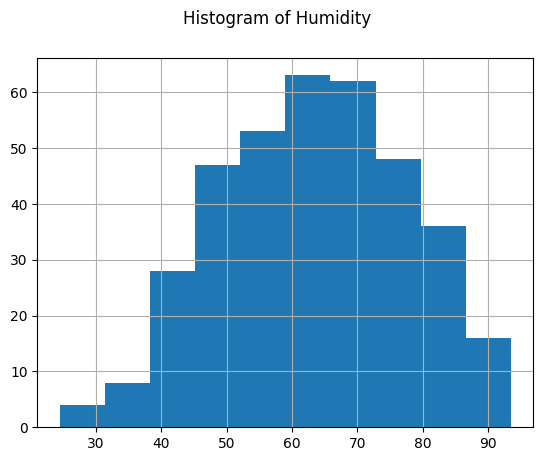

In [23]:
hist = df_output.Humidity.hist()
pl.suptitle("Histogram of Humidity")

### Temperature

Text(0.5, 0.98, 'Histogram of Temperature')

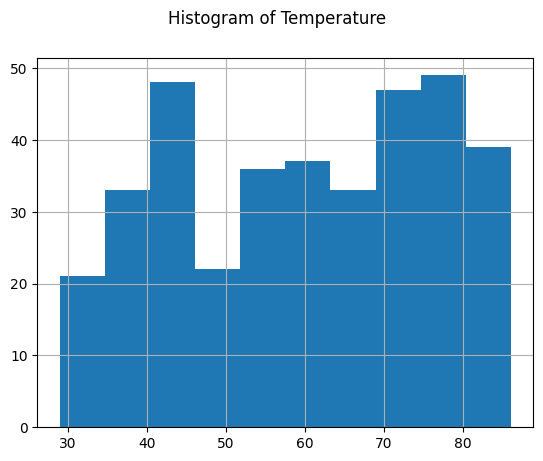

In [24]:
hist = df_output.Temperature.hist()
pl.suptitle("Histogram of Temperature")

In [25]:
df_output.dtypes

index                     int64
Temperature             float64
Dew_Point               float64
Humidity                float64
Wind                    float64
Pressure                float64
Precipitation           float64
Date             datetime64[ns]
dtype: object

## Question 6: Line Plot

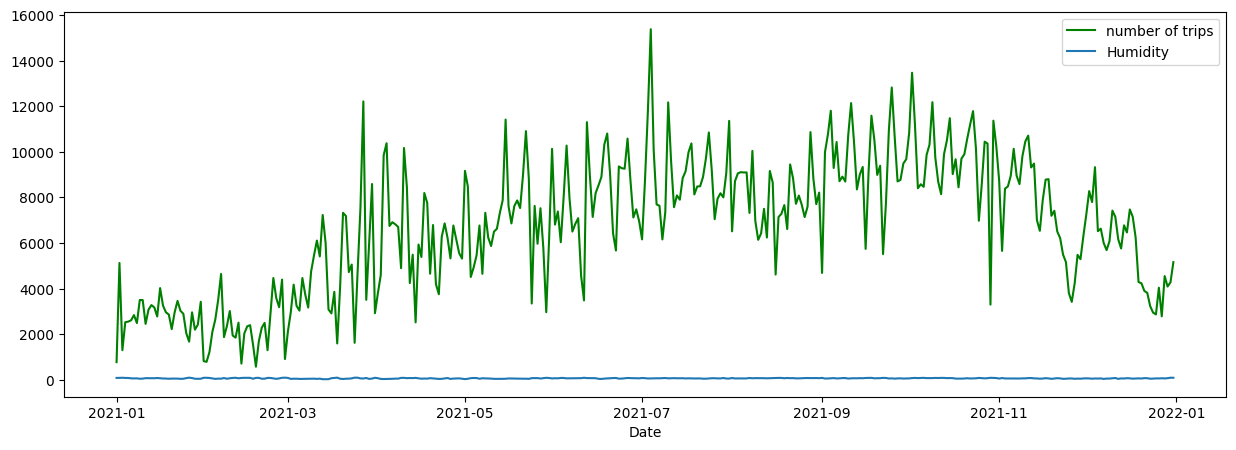

In [26]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))
plt.plot(df.groupby('Date').size(), label='number of trips',c='green')
plt.plot(df_output.Date , df_output.Humidity, label='Humidity')
plt.xlabel("Date")
plt.legend()

#### These two variables do not have the same measurement unit, it is better to display them in two separate graphs
### Humidity line plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


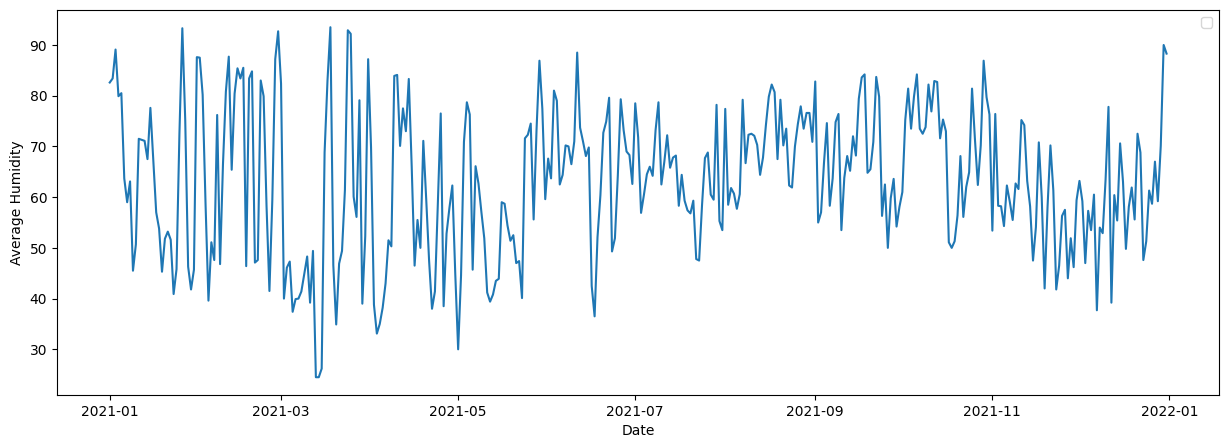

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(df_output.Date, df_output.Humidity)
plt.ylabel("Average Humidity")
plt.xlabel("Date")
plt.legend()

### Number of trips plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


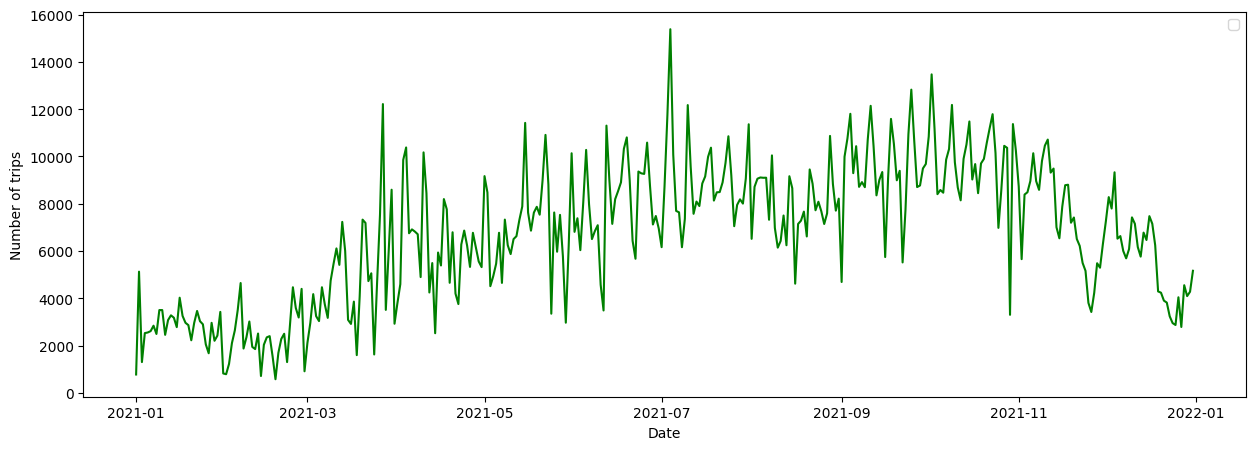

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(df.groupby('Date').size(),c='green')
plt.ylabel("Number of trips")
plt.xlabel("Date")
plt.legend()